In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
books= pd.read_csv('books.csv')
users= pd.read_csv('users.csv')
ratings= pd.read_csv('ratings.csv')

C:\Users\pkhad\AppData\Local\Temp\ipykernel_19340\1932650548.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books= pd.read_csv('books.csv')


In [4]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [6]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [7]:
print(books.shape)
print(users.shape)
print(ratings.shape)


(271360, 8)
(278858, 3)
(1149780, 3)


## checking null values

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
#users.isnull().sum()
#soo much null value in age but age column is not importantin out model so we will will leave as it is

In [10]:
ratings.isnull().sum()


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## checking duplicates

In [11]:
books.duplicated().sum()

np.int64(0)

In [12]:
users.duplicated().sum()

np.int64(0)

In [13]:
ratings.duplicated().sum()

np.int64(0)

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [16]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
## uniques values in books dataset
print("Unique ISBNs:", books['ISBN'].nunique())
print("Unique Titles:", books['Book-Title'].nunique())
print("Unique Authors:", books['Book-Author'].nunique())
print("Unique Publishers:", books['Publisher'].nunique())

Unique ISBNs: 271360
Unique Titles: 242135
Unique Authors: 102022
Unique Publishers: 16807


In [18]:
#convert year to numeric, invallid became nan
books['Year-Of-Publication']= pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

In [19]:
print("Max Year:", books['Year-Of-Publication'].max())
print("Min Year:", books['Year-Of-Publication'].min())

Max Year: 2050.0
Min Year: 0.0


In [20]:
##check invalid years
print('\nYears less than 1000:')
books[books['Year-Of-Publication']<1000]['Year-Of-Publication'].value_counts()


Years less than 1000:


Year-Of-Publication
0.0    4618
Name: count, dtype: int64

In [21]:
print("\nYears greater than 2023:")
print(books[books['Year-Of-Publication'] > 2025]['Year-Of-Publication'].value_counts())



Years greater than 2023:
Year-Of-Publication
2030.0    7
2050.0    2
2038.0    1
2026.0    1
2037.0    1
Name: count, dtype: int64


## Step 4: Clean Year of Publication

We’ll replace invalid years with NaN so they don’t affect analysis.

After Cleaning:
Min Year: 1806.0
Max Year: 2024.0


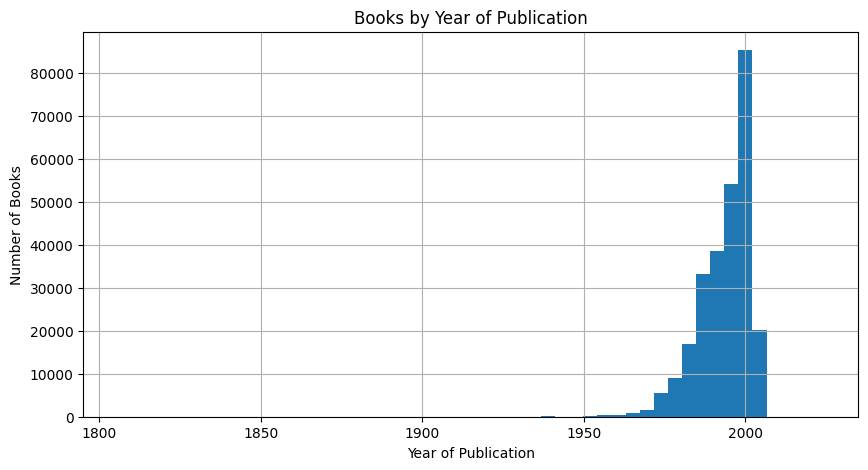

In [22]:
# Set unrealistic years to NaN
books.loc[(books['Year-Of-Publication'] < 1500) | 
          (books['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = None

print("After Cleaning:")
print("Min Year:", books['Year-Of-Publication'].min())
print("Max Year:", books['Year-Of-Publication'].max())

# Plot distribution
import matplotlib.pyplot as plt

books['Year-Of-Publication'].dropna().astype(int).hist(bins=50, figsize=(10,5))
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.title("Books by Year of Publication")
plt.show()


## Step 5: Authors & Publishers

Now, let’s explore the top contributors in the books dataset.

In [23]:
# Top authors
top_authors = books['Book-Author'].value_counts().head(10)
print("Top 10 Authors:\n", top_authors)

# Top publishers
top_publishers = books['Publisher'].value_counts().head(10)
print("\nTop 10 Publishers:\n", top_publishers)

Top 10 Authors:
 Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

Top 10 Publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


## plot
## Top 10 Authors by Number of Books

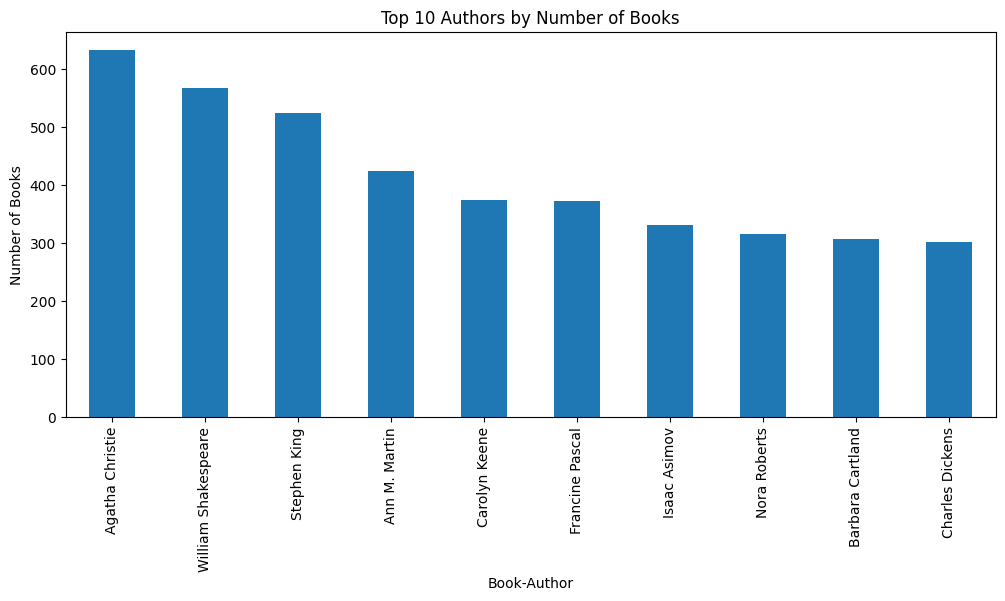

In [24]:
plt.figure(figsize=(12,5))
top_authors.plot(kind='bar')
plt.title("Top 10 Authors by Number of Books")
plt.ylabel("Number of Books")
plt.show()

## Top 10 Publishers by Number of Books


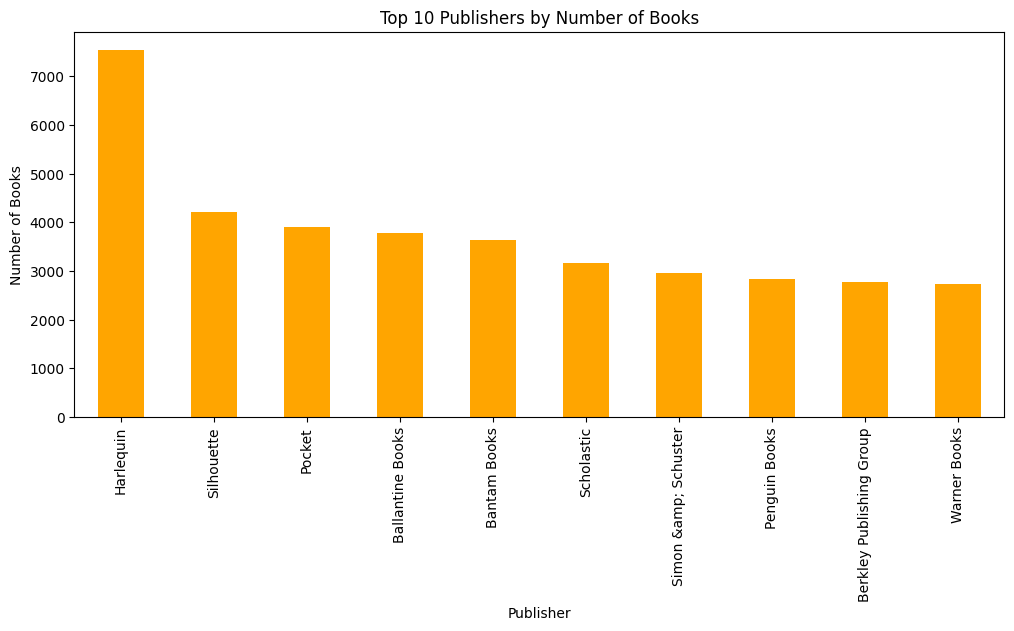

In [25]:
plt.figure(figsize=(12,5))
top_publishers.plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Number of Books")
plt.ylabel("Number of Books")
plt.show()

## Users Dataset Exploration

Now let’s shift focus to Users. We’ll analyze Age and Location.

In [26]:
# Age distribution
print("Min Age:", users['Age'].min())
print("Max Age:", users['Age'].max())

Min Age: 0.0
Max Age: 244.0


In [27]:
# Check invalid ages
print("\nUsers with Age < 5 or > 100:")
print(users[(users['Age'] < 5) | (users['Age'] > 100)].shape)


Users with Age < 5 or > 100:
(1248, 3)


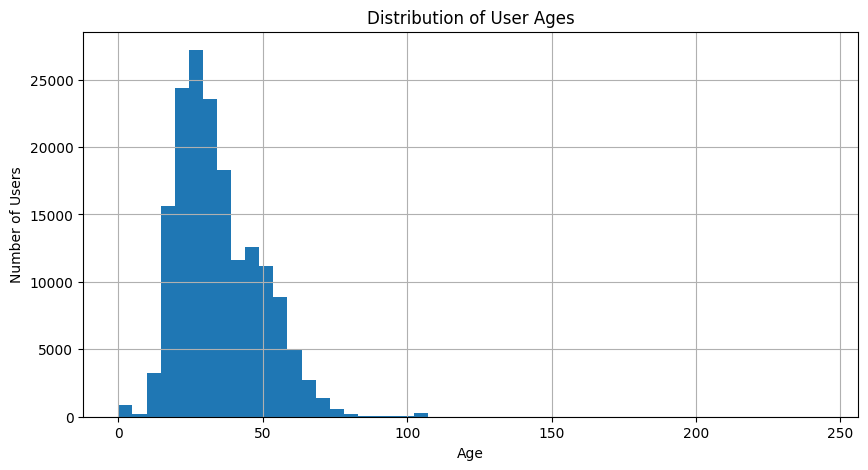

In [28]:
# Plot histogram of age
users['Age'].dropna().hist(bins=50, figsize=(10,5))
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Distribution of User Ages")
plt.show()

In [29]:
users.value_counts()

User-ID  Location                            Age 
2        stockton, california, usa           18.0    1
4        porto, v.n.gaia, portugal           17.0    1
6        santa monica, california, usa       61.0    1
10       albacete, wisconsin, spain          26.0    1
11       melbourne, victoria, australia      14.0    1
                                                    ..
278849   georgetown, ontario, canada         23.0    1
278851   dallas, texas, usa                  33.0    1
278852   brisbane, queensland, australia     32.0    1
278853   stranraer, n/a, united kingdom      17.0    1
278855   tacoma, washington, united kingdom  50.0    1
Name: count, Length: 168096, dtype: int64

In [30]:
# Split location into parts
users[['City','State','Country']] = users['Location'].str.split(',', n=2, expand=True)


In [31]:
# Clean whitespace
users['Country'] = users['Country'].str.strip()

In [32]:
# Top 10 countries
print("\nTop 10 Countries by Users:")
print(users['Country'].value_counts().head(10))


Top 10 Countries by Users:
Country
usa               139183
canada             21556
united kingdom     18286
germany            17021
spain              13088
australia          11719
italy              11238
                    4561
france              3440
portugal            3305
Name: count, dtype: int64


## Ratings Dataset Exploration

Now let’s explore ratings behavior: scale, distribution, and activity.

In [33]:
# Rating distribution
print("Unique Ratings:", ratings['Book-Rating'].unique())
print("Rating Counts:\n", ratings['Book-Rating'].value_counts().sort_index())

Unique Ratings: [ 0  5  3  6  8  7 10  9  4  1  2]
Rating Counts:
 Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


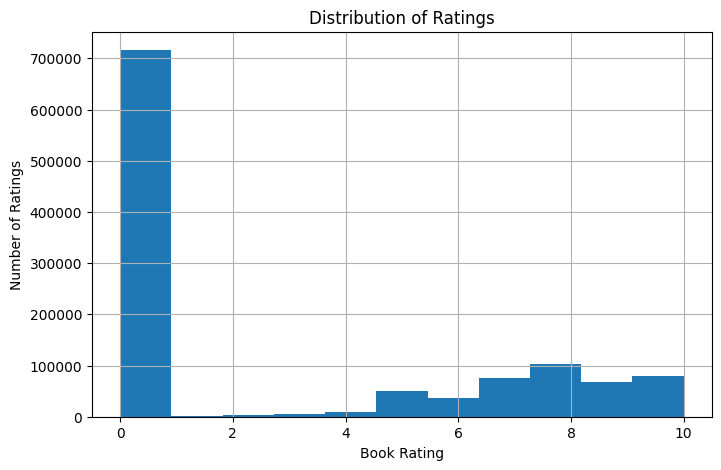

In [34]:
# Plot distribution
ratings['Book-Rating'].hist(bins=11, figsize=(8,5))
plt.xlabel("Book Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.show()

In [35]:
# Unique users and books
print("Unique Users in Ratings:", ratings['User-ID'].nunique())
print("Unique Books in Ratings:", ratings['ISBN'].nunique())

Unique Users in Ratings: 105283
Unique Books in Ratings: 340556


In [36]:
# Most active users
print("\nTop 10 Most Active Users:")
print(ratings['User-ID'].value_counts().head(10))


Top 10 Most Active Users:
User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


In [37]:
# Most rated books
print("\nTop 10 Most Rated Books:")
print(ratings['ISBN'].value_counts().head(10))


Top 10 Most Rated Books:
ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: count, dtype: int64


## Sparsity Check

Let’s calculate how sparse the ratings matrix is (fraction of filled entries).

In [38]:
import numpy as np

num_users = ratings['User-ID'].nunique()
num_books = ratings['ISBN'].nunique()
num_ratings = ratings.shape[0]

# Possible ratings in full matrix
possible_ratings = num_users * num_books

# Sparsity
sparsity = 1 - (num_ratings / possible_ratings)
print(f"Sparsity of Ratings Matrix: {sparsity:.6f}")


Sparsity of Ratings Matrix: 0.999968


# Interpretation:

Sparsity = 0.999968 → ~99.997% of matrix is empty!

Meaning:

Out of all possible (user, book) pairs, only 0.003% have ratings.

Most books have very few ratings, and most users rate very few books.

EDA Summary (So Far)

Books Dataset:

Cleaned years: valid range is 1806–2024.

Top authors: Agatha Christie, Shakespeare, Stephen King.

Top publishers: Harlequin, Silhouette, Pocket.

Few missing values (manageable).

Users Dataset:

105k unique users.

Age column: many missing; ~1,200 outliers (<5 or >100).

Dominant countries: USA, Canada, UK.

Some missing country values → treat as "Unknown".

Ratings Dataset:

1.1M ratings total.

Heavy skew: 716k implicit (0) ratings, ~400k explicit ratings.

Rating scale 1–10 is used, but imbalanced (8, 9, 10 more common).

Sparsity = 0.999968 → classic challenge for recommender systems.

Few “power users” and “popular books” dominate activity.

## popularity based recommendation system

In [42]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [50]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [53]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [54]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [59]:
popular_df = popular_df[popular_df['num_ratings'] > 250].sort_values('avg_ratings', ascending = False).head(50)

In [60]:
popular_df

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [65]:
popular_df = popular_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M','num_ratings', 'avg_ratings']]

In [63]:
popular_df.shape

(50, 3)

In [66]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## collaborative filtering based recommendation system

In [69]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
book_readers= x[x].index

In [73]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(book_readers)]

In [75]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>50

In [79]:
famous_books= y[y].index

In [80]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [83]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [89]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [90]:
pt.fillna(0,inplace = True)

In [91]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
similarity_scores = cosine_similarity(pt)

In [103]:
similarity_scores.shape

(679, 679)

In [120]:
def recommend(book_name):
    #fetching index
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1], reverse= True)[1:6]
    for i in similar_items:
        print(pt.index[i[0]])
    

In [125]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [129]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [128]:
pt.index[43]


'Angels &amp; Demons'

In [106]:
#np.where(pt.index == 'Zoya')[0][0]

In [108]:
#sorted(list(enumerate(similarity_scores[0])),key = lambda x:x[1], reverse= True)[1:6]

[(46, np.float64(0.2702651417103732)),
 (524, np.float64(0.2639619371123497)),
 (80, np.float64(0.23669374347400993)),
 (610, np.float64(0.23299389358170394)),
 (530, np.float64(0.2262639743141286))]